In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.cmap'] = 'Greys'

import numpy as np
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
print (mnist.train.images.shape)
print (mnist.train.labels.shape)

(55000, 784)
(55000, 10)


In [4]:
print (mnist.test.images.shape)
print (mnist.test.labels.shape)

(10000, 784)
(10000, 10)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


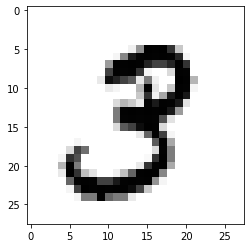

In [5]:
example_image = mnist.train.images[1]
example_image_reshaped = example_image.reshape((28, 28)) # Can't render a line of 784 numbers
example_label = mnist.train.labels[1]

print (example_label)
plt.imshow(example_image_reshaped)

In [6]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

In [39]:
# Define some helper functions to ease the definition of the model
def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

def bias_variable(shape):
    return tf.Variable(tf.constant(0.1, shape=shape))

def conv(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def pool(x):
    return tf.nn.m(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


# A score function (model) involving some layers

# Reshape the input to look like a volume (Input)
x_image = tf.reshape(x, [-1, 28, 28, 1])

# A convolutional layer (CONV -> RELU -> POOL)
W_conv1 = weight_variable([3, 3, 1, 64])
b_conv1 = bias_variable([64])
o_conv1 = tf.nn.relu(conv(x_image, W_conv1) + b_conv1)

W_conv2 = weight_variable([3, 3, 64, 1])
b_conv2 = bias_variable([64])
o_conv2 = tf.nn.relu(conv(o_conv1, W_conv2) + b_conv2)

o_pool2 = tf.nn.max_pool(o_conv2, (1, 2, 2, 1), strides=(1, 2, 2, 1), padding='VALID')

W_conv3 = weight_variable([3, 3, 64, 128])
b_conv3 = bias_variable([128])
o_conv3 = tf.nn.relu(conv(o_pool2, W_conv3) + b_conv3)

W_conv4 = weight_variable([3, 3, 128, 1])
b_conv4 = bias_variable([128])
o_conv4 = tf.nn.relu(conv(o_conv3, W_conv4) + b_conv4)

o_pool4 = tf.nn.max_pool(o_conv4, (1, 2, 2, 1), strides=(1, 2, 2, 1), padding='VALID' )

W_conv5 = weight_variable([3, 3, 128, 256])
b_conv5 = bias_variable([256])
o_conv5 = tf.nn.relu(conv(o_pool4, W_conv5) + b_conv5)

W_conv6 = weight_variable([3, 3, 256, 1])
b_conv6 = bias_variable([256])
o_conv6 = tf.nn.relu(conv(o_conv5, W_conv6) + b_conv6)

W_conv7 = weight_variable([3, 3, 256, 1])
b_conv7 = bias_variable([256])
o_conv7 = tf.nn.relu(conv(o_conv6, W_conv7) + b_conv7)

o_pool7 = tf.nn.max_pool(o_conv7, (1, 2, 2, 1), strides=(1, 2, 2, 1), padding='VALID')

W_conv8 = weight_variable([3, 3, 256, 512])
b_conv8 = bias_variable([512])
o_conv8 = tf.nn.relu(conv(o_pool7, W_conv8) + b_conv8)

W_conv9 = weight_variable([3, 3, 512, 1])
b_conv9 = bias_variable([512])
o_conv9 = tf.nn.relu(conv(o_conv8, W_conv9) + b_conv9)

W_conv10 = weight_variable([3, 3, 512, 1])
b_conv10 = bias_variable([512])
o_conv10 = tf.nn.relu(conv(o_conv9, W_conv10) + b_conv10)

o_pool10 = tf.nn.max_pool(o_conv10, (1, 2, 2, 1), strides=(1, 2, 2, 1), padding='VALID')

W_conv11 = weight_variable([3, 3, 512, 1])
b_conv11 = bias_variable([512])
o_conv11 = tf.nn.relu(conv(o_pool10, W_conv11) + b_conv11)

W_conv12 = weight_variable([3, 3, 512, 1])
b_conv12 = bias_variable([512])
o_conv12 = tf.nn.relu(conv(o_conv11, W_conv12) + b_conv12)

W_conv13 = weight_variable([3, 3, 512, 1])
b_conv13 = bias_variable([512])
o_conv13 = tf.nn.relu(conv(o_conv12, W_conv13) + b_conv13)

o_pool13 = tf.nn.max_pool(o_conv13, (1, 2, 2, 1), strides=(1, 2, 2, 1), padding='VALID')


# A densely connected layer (FC)
W_fc1 = weight_variable([14*14*32, 1024])
b_fc1 = bias_variable([1024])
h_pool_flat = tf.reshape(h_pool, [-1, 14*14*32])
h_fc1 = tf.nn.relu(tf.matmul(h_pool_flat, W_fc1) + b_fc1)

# Another densely connected layer (for "readout") (FC)
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y = tf.matmul(h_fc1, W_fc2) + b_fc2

ValueError: Negative dimension size caused by subtracting 2 from 1 for 'MaxPool_28' (op: 'MaxPool') with input shapes: [?,1,1,512].

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

input_shape = (28, 28, 3)


model = Sequential([
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1000, activation='softmax')
])

model.summary()

TypeError: Tensor objects are only iterable when eager execution is enabled. To iterate over this tensor use tf.map_fn.